In [1]:
import cv2
import numpy as np
# import os
# import pytesseract
# import imutils
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_images(img1,img2,title1=" ",title2=" "):
    fig=plt.figure(figsize=[15,15])
    ax1=fig.add_subplot(221)
    ax1.imshow(img1,cmap="gray")
    ax1.set(xticks=[],yticks=[],title=title1)
    
    ax2=fig.add_subplot(222)
    ax2.imshow(img2,cmap="gray")
    ax2.set(xticks=[],yticks=[],title=title2)

In [3]:
path=("boy_car.jpg")

In [4]:
image=cv2.imread(path)

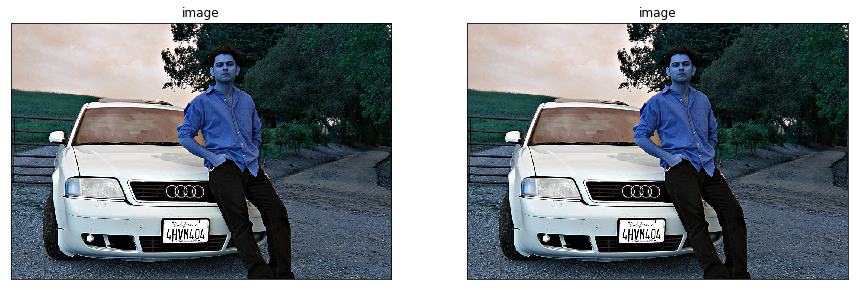

In [5]:
plot_images(image,image,"image","image")

In [6]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

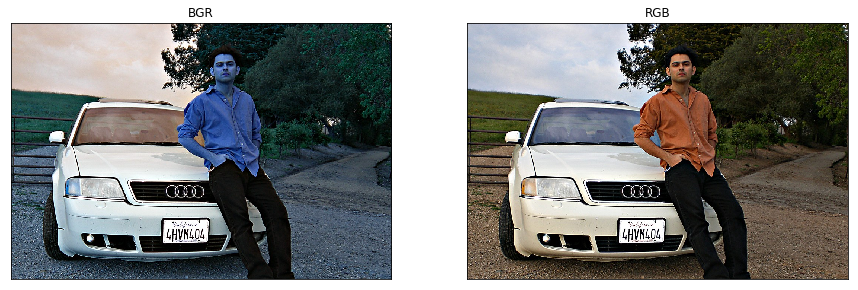

In [7]:
plot_images(image,image_rgb,"BGR","RGB")

In [8]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

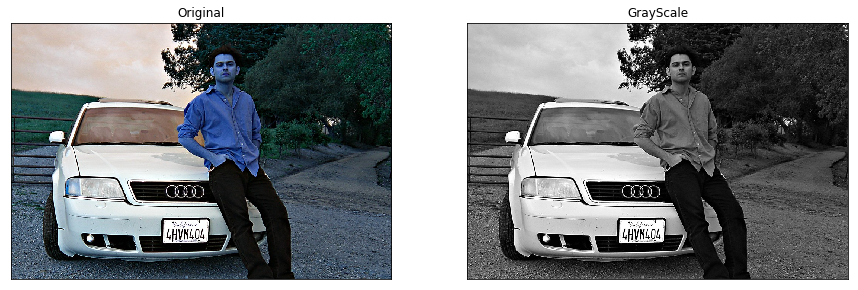

In [9]:
plot_images(image,gray,"Original","GrayScale")

In [10]:
# BilateralFilter is highly effective in noise removal while keeping edges sharp.

blur=cv2.bilateralFilter(gray,11,60,60)
# 11=Diameter of the each pixel neighborhood
# 60=sigma color :value of sigma in colour space
# 60=sigmacolour :value of sigma in co-ordinate space

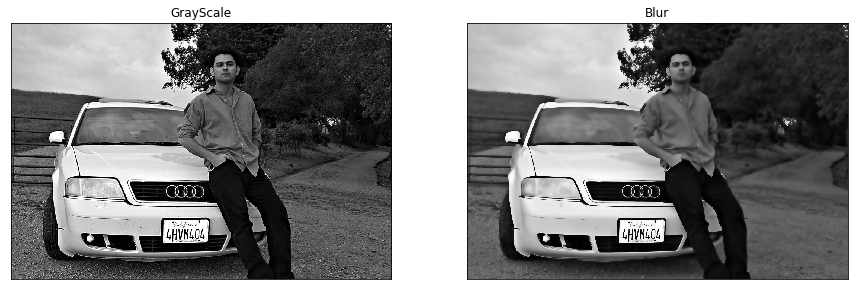

In [11]:
plot_images(gray,blur,"GrayScale","Blur")

In [12]:
#The function finds edges in the input image and marks them in the output map.
edges=cv2.Canny(blur,30,300)

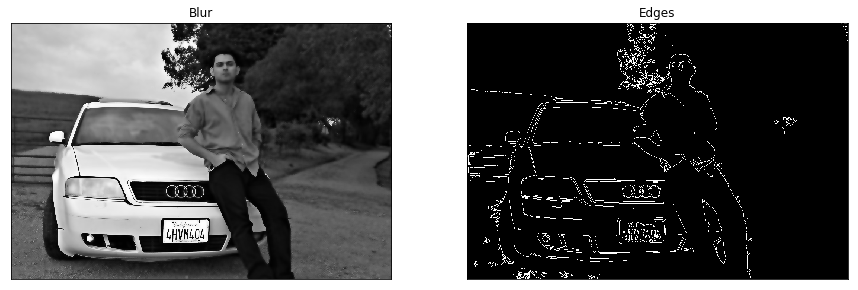

In [13]:
plot_images(blur,edges,"Blur","Edges")

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition

In [14]:
# findContours helps in extracting th contours from the image
_,cnts, _=cv2.findContours(edges.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [15]:
image_copy=image.copy()
_=cv2.drawContours(image_copy,cnts,-1,(255,0,255),2)

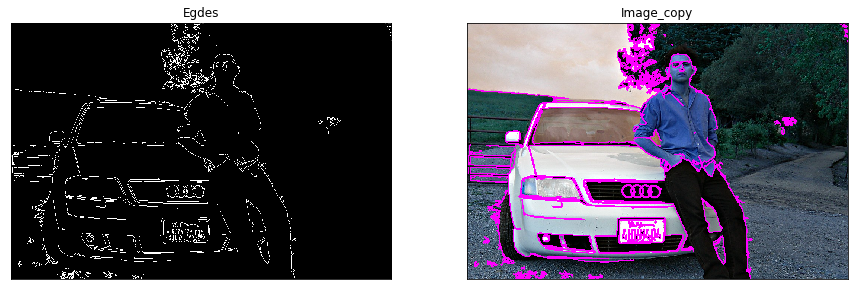

In [16]:
plot_images(edges,image_copy,"Egdes","Image_copy")

In [17]:
cnts=sorted(cnts,key=cv2.contourArea,reverse=True)[:10]

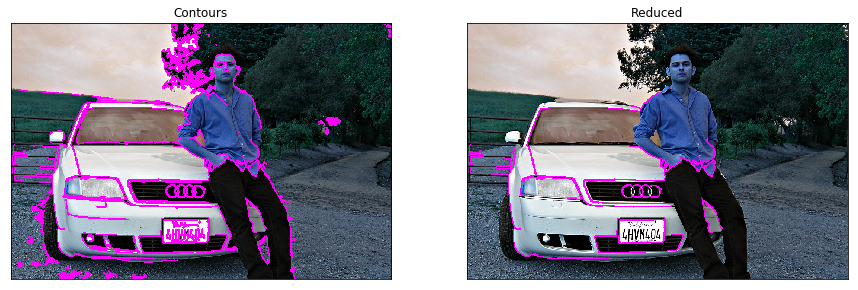

In [18]:
imag_reduced_cnts=image.copy()
_=cv2.drawContours(imag_reduced_cnts,cnts,-1,(255,0,255),2)
plot_images(image_copy,imag_reduced_cnts,title1="Contours",title2="Reduced")

In [19]:
plate=None
for c in cnts:
    perimeter=cv2.arcLength(c,True)
    edges_count=cv2.approxPolyDP(c,0.02*perimeter,True)
    if len(edges_count) == 4:
        x,y,w,h=cv2.boundingRect(c)
        plate=image[y:y+h,x:x+w]
        break
        
cv2.imwrite("number_plate.png", plate)
# cv2.imwrite(str(w) + str(h) + '_number_plate.jpg', plate)

True

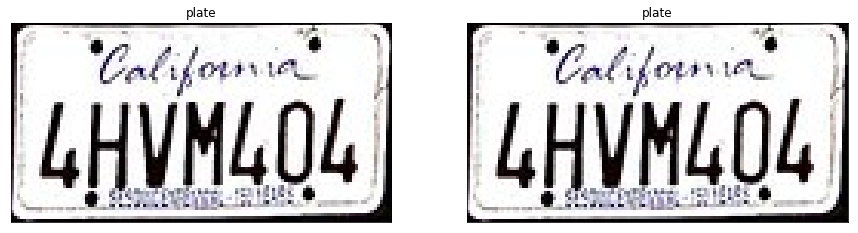

In [20]:
plot_images(plate,plate,title1="plate",title2="plate")

In [21]:
# text=pytesseract.image_to_string(plate,lang="eng")
# text

In [22]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [23]:
faces_rects = haar_cascade_face.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 5);
# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


In [24]:
# def convertToRGB(image):
#     return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [25]:
for (x,y,w,h) in faces_rects:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0),4)
    roi_color=image[y:y + h, x:x + w]
    cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)
    
cv2.imwrite('faces_detected.jpg',image)

True

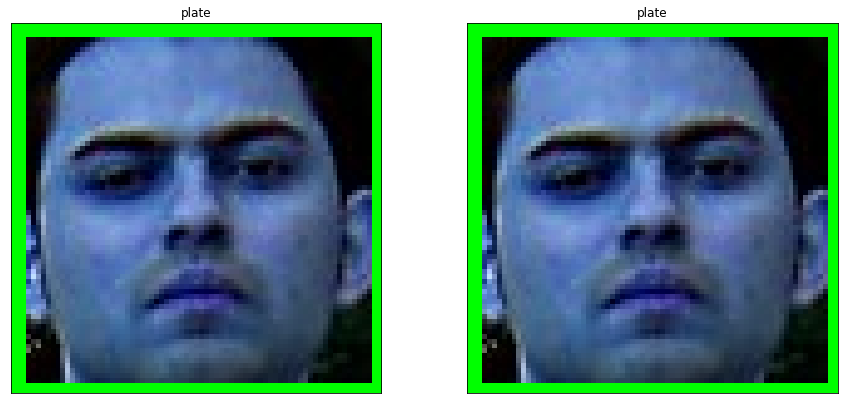

In [26]:
plot_images(roi_color,roi_color,title1="plate",title2="plate")